## I + RISE + Gosling + HGDP analysis

Data were collected from four sources- I, RISE, Gossling and HGDP data. We apply an unsupervised method of clustering 
the data and then visualizing the results.

In [1]:
options(warn=-1)
library(aRchaic)
library(CountClust)
library(maptpx)
library(grid)
library(gridBase)

Loading required package: ggplot2


In [2]:
gossling_data <- get(load("../processed_data/annagosling2016-counts-table.rda"))
system.time(gossling_data_clubbed <- club_signature_counts(gossling_data))
gossling_data_clubbed <- gossling_data_clubbed[-28,];

names <- rownames(gossling_data_clubbed);
control_indices <- c(grep("EXN", names), grep("Libneg", names), grep("PCRneg", names))

labs <- character();
labs <- rep("ancient", dim(gossling_data_clubbed)[1])
labs[control_indices] <- "controls"

indices <- which(labs == "ancient")

gossling_ancients <- gossling_data_clubbed[indices, ]


I_data <- get(load("../processed_data/Idata-counts-table.rda"))
I_data <- club_signature_counts(I_data)
RISE_data <- get(load("../processed_data/RISE-counts-table.rda"))
RISE_data <- club_signature_counts(RISE_data)
hgdp_data <- get(load("../processed_data/HGDPmoderns-counts-table.rda"))
hgdp_data <- club_signature_counts(hgdp_data)


pooled_names <- intersect(colnames(I_data),
                          intersect(colnames(RISE_data),
                                    intersect(colnames(gossling_ancients), colnames(hgdp_data))))

filtered_gossling <- gossling_ancients[, match(pooled_names, colnames(gossling_ancients))]
filtered_I <- I_data[, match(pooled_names, colnames(I_data))]
filtered_RISE <- RISE_data[, match(pooled_names, colnames(RISE_data))]
filtered_hgdp <- hgdp_data[, match(pooled_names, colnames(hgdp_data))]

pooled_data <- rbind(filtered_gossling, filtered_I, filtered_RISE, filtered_hgdp)

   user  system elapsed 
 20.575   0.703  26.122 

In [3]:
## Signatures defined as factors

signature_set <- colnames(pooled_data)
sig_split <- t(sapply(1:length(signature_set), function(x) return(strsplit(signature_set[x], "")[[1]][1:8])))
new_sig_split <- matrix(0, dim(sig_split)[1], 5);
new_sig_split[,1] <- sig_split[,1]
new_sig_split[,2] <- sig_split[,2]
new_sig_split[,3] <- sapply(1:length(signature_set), function(x) return(paste(sig_split[x,3:6], collapse="")))
new_sig_split[,4] <- sig_split[,7]
new_sig_split[,5] <- sig_split[,8]

indices_notCtoA <-  which(new_sig_split[,3] != "C->T")
pooled_data <- pooled_data[, indices_notCtoA]
pooled_data <- filter_signatures_wo_location(pooled_data)


levels(new_sig_split[,1]) <- c("0", "1", "2", "3", "4")

pos <- t(sapply(1:length(signature_set), function(x)
{
  y = strsplit(signature_set[x], "")[[1]]
  return(paste(y[10:length(y)], collapse=""))
}))



mat <- matrix(0, dim(new_sig_split)[1], dim(new_sig_split)[2])
for(k in 1:dim(new_sig_split)[2]){
  temp <- as.factor(new_sig_split[,k])
  mat[,k] <- as.numeric(as.matrix(plyr::mapvalues(temp, from = levels(temp), to = 0:(length(levels(temp))-1))))
}

pos <- as.numeric(pos)
pos <- pos - min(pos)
pos <- factor(pos, levels = 0:22)

signatures <- mat;
signature_pos <- cbind.data.frame(signatures, pos)

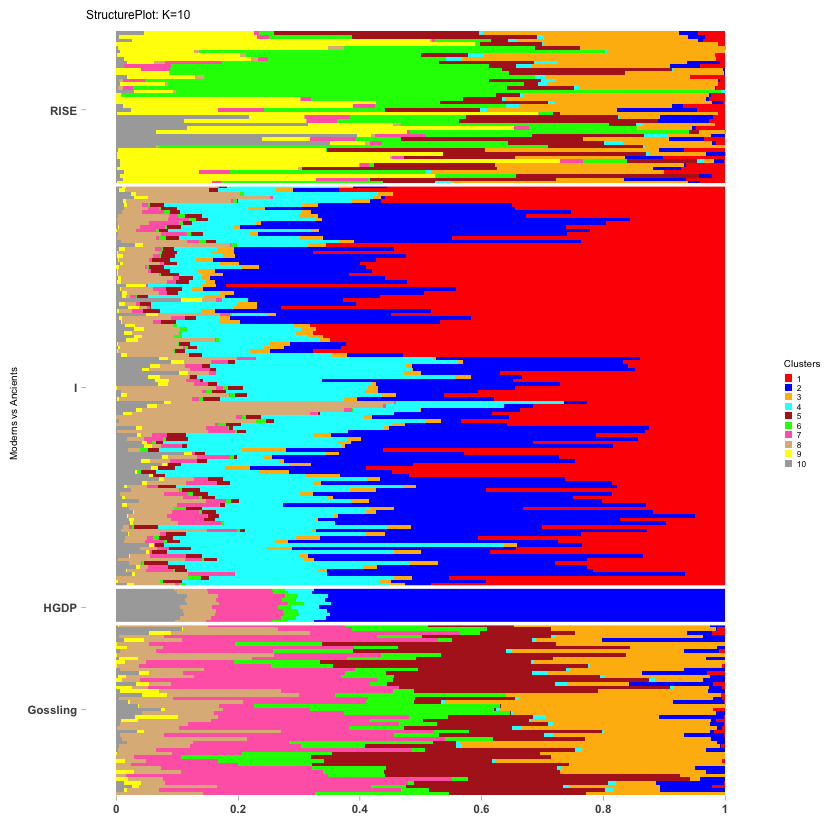

In [18]:
out <- get(load("../processed_data/maptpx-runs/i-rise-gosling-hgdp-maptpx-independent-K-10.rda"))

labs <- c(rep("Gossling", dim(filtered_gossling)[1]), rep("I", dim(filtered_I)[1]),
          rep("RISE", dim(filtered_RISE)[1]), rep("HGDP", dim(filtered_hgdp)[1]))
labs <- labs

omega <- out$omega

cols1 <- c("red","blue","darkgoldenrod1","cyan","firebrick", "green",
           "hotpink","burlywood","yellow","darkgray","deepskyblue","darkkhaki",
           "brown4","darkorchid","magenta","yellow", "azure1","azure4")

annotation <- data.frame(
  sample_id = paste0("X", c(1:NROW(omega))),
  tissue_label = factor(labs)
)

CountClust::StructureGGplot(omega = omega,
                            annotation = annotation,
                            palette = cols1,
                            yaxis_label = "Moderns vs Ancients",
                            order_sample = FALSE,
                            figure_title = paste0("StructurePlot: K=", dim(omega)[2],""),
                            axis_tick = list(axis_ticks_length = .1,
                                             axis_ticks_lwd_y = .1,
                                             axis_ticks_lwd_x = .1,
                                             axis_label_size = 7,
                                             axis_label_face = "bold"))

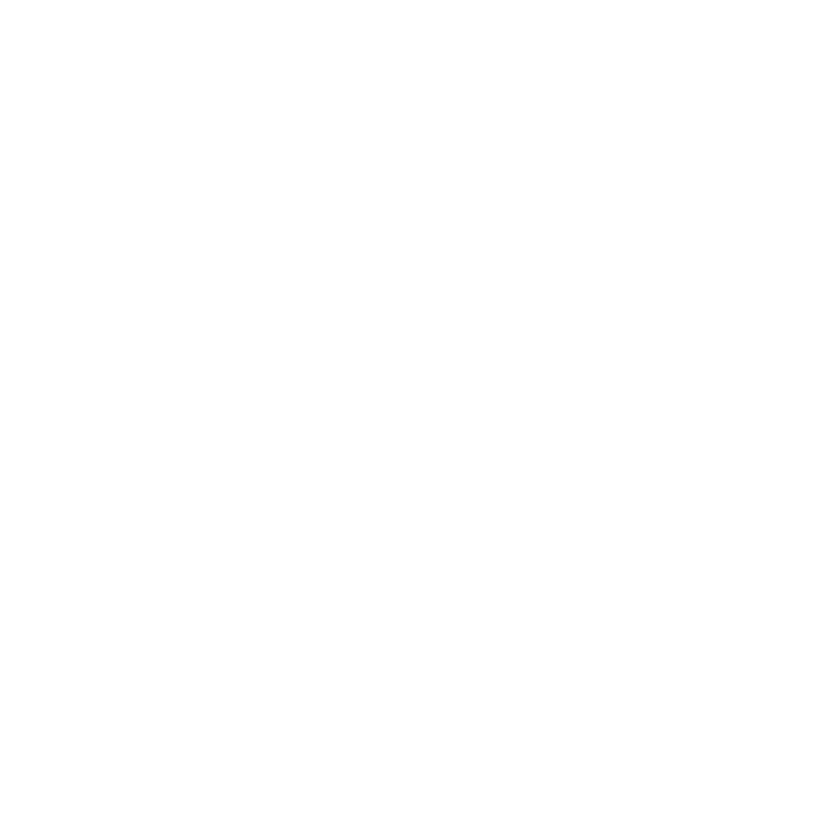

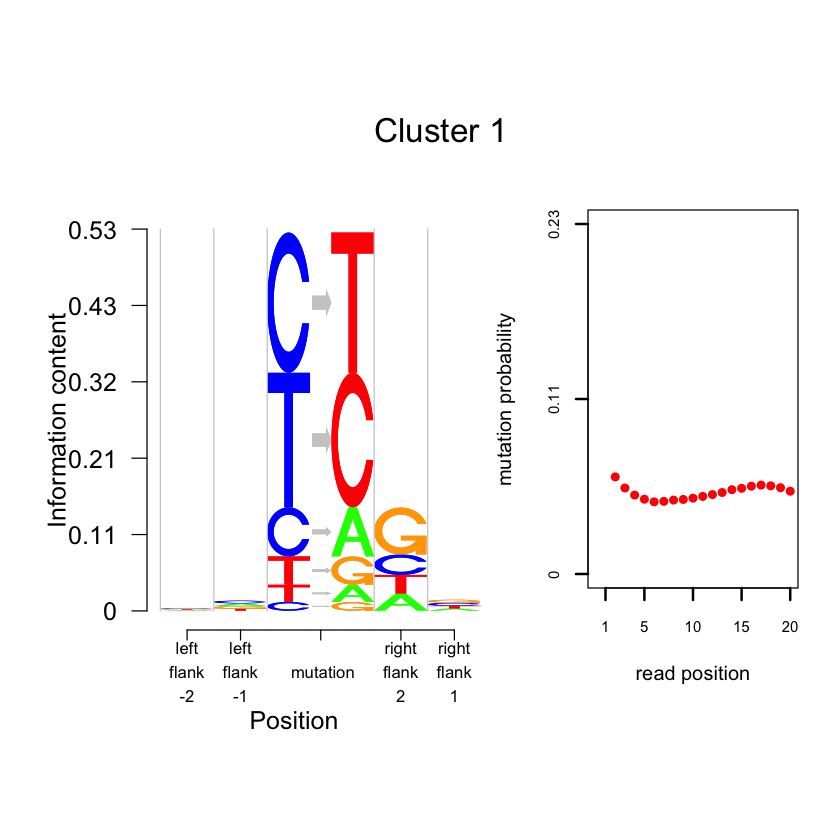

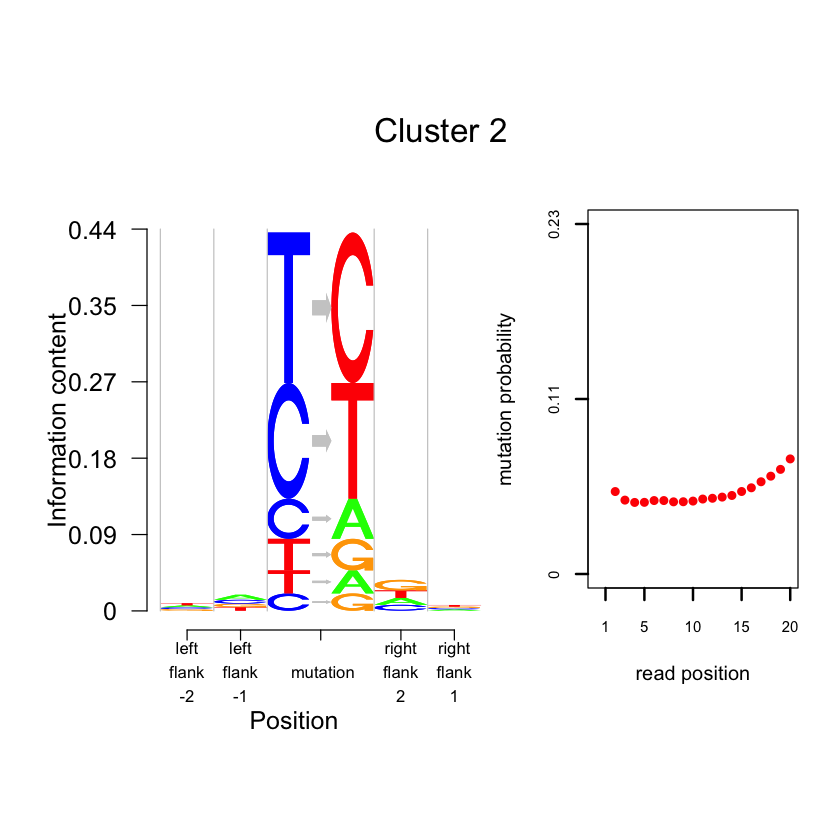

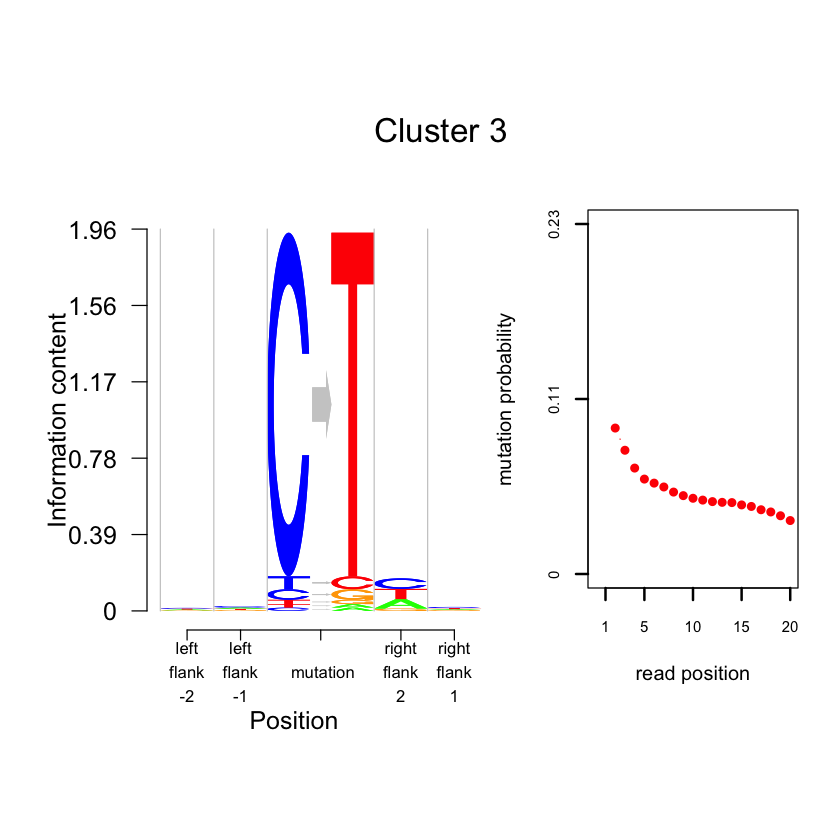

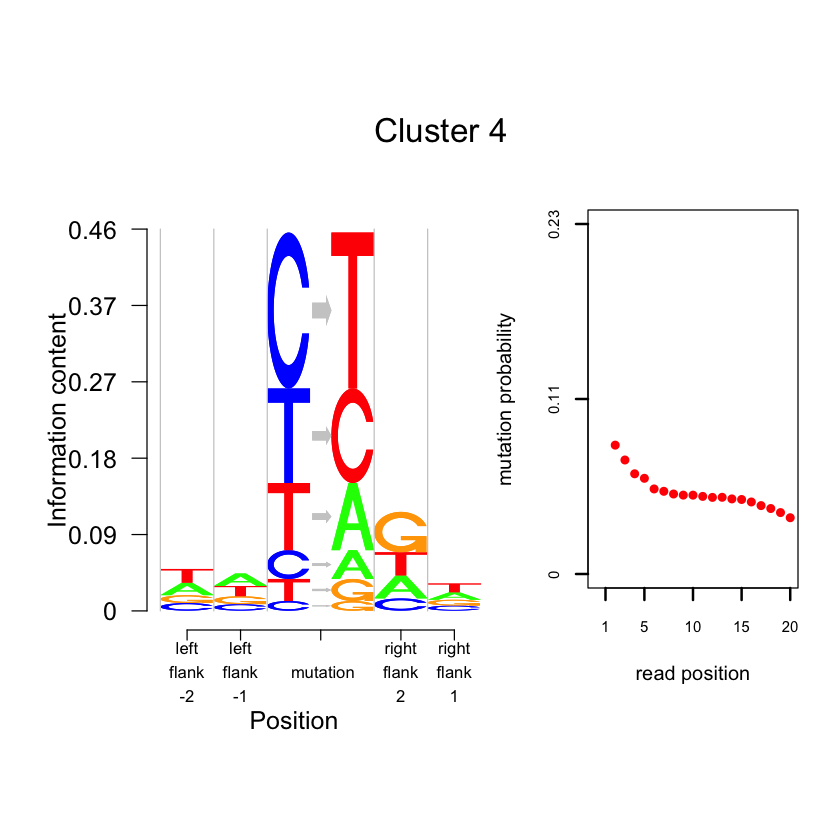

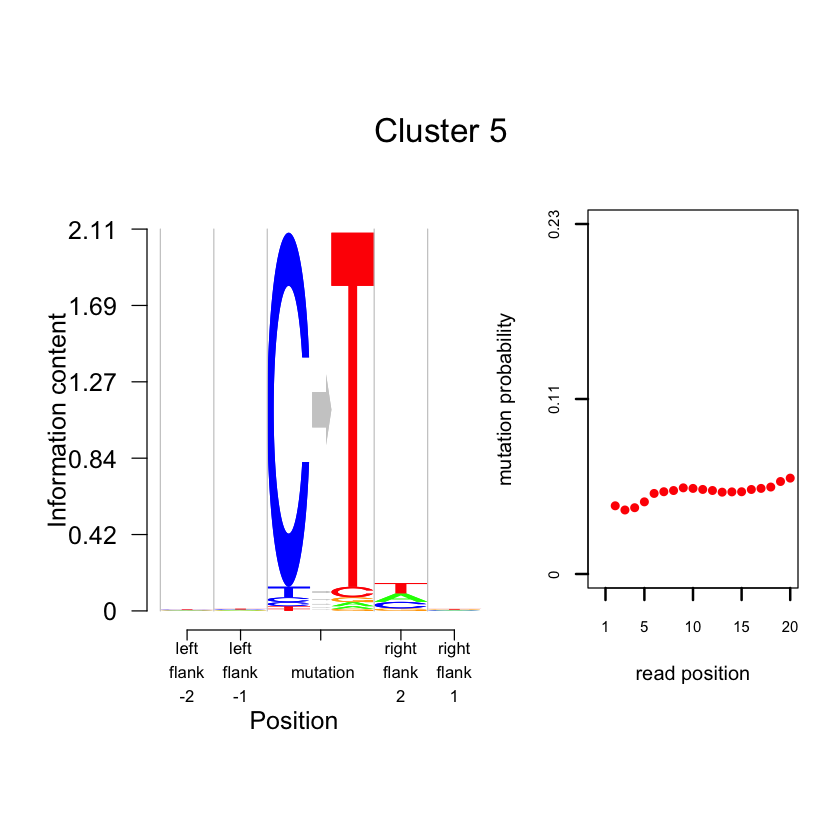

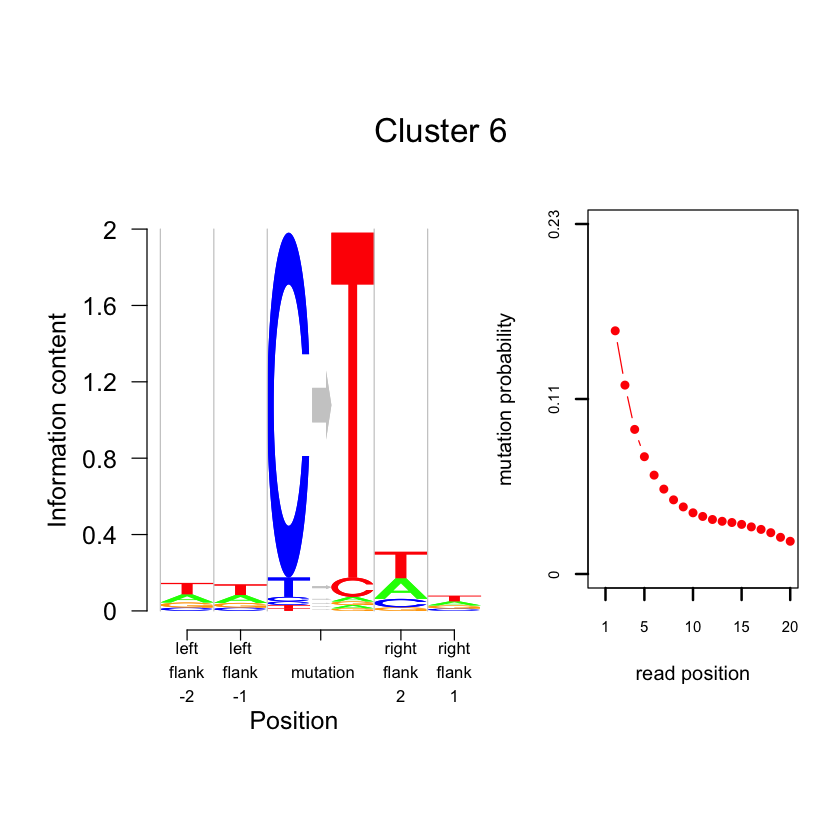

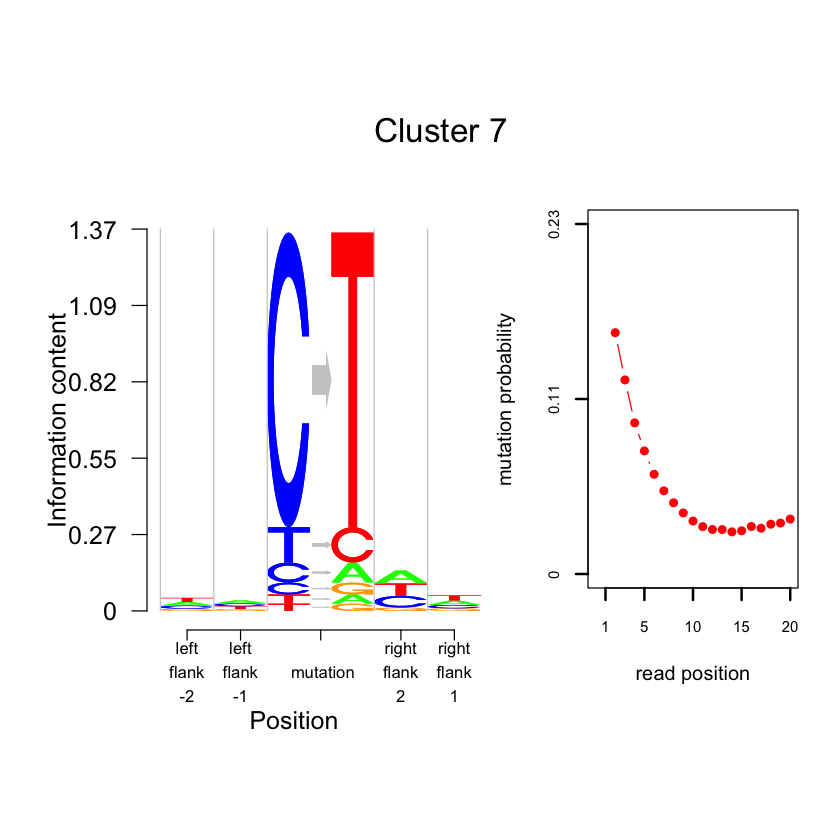

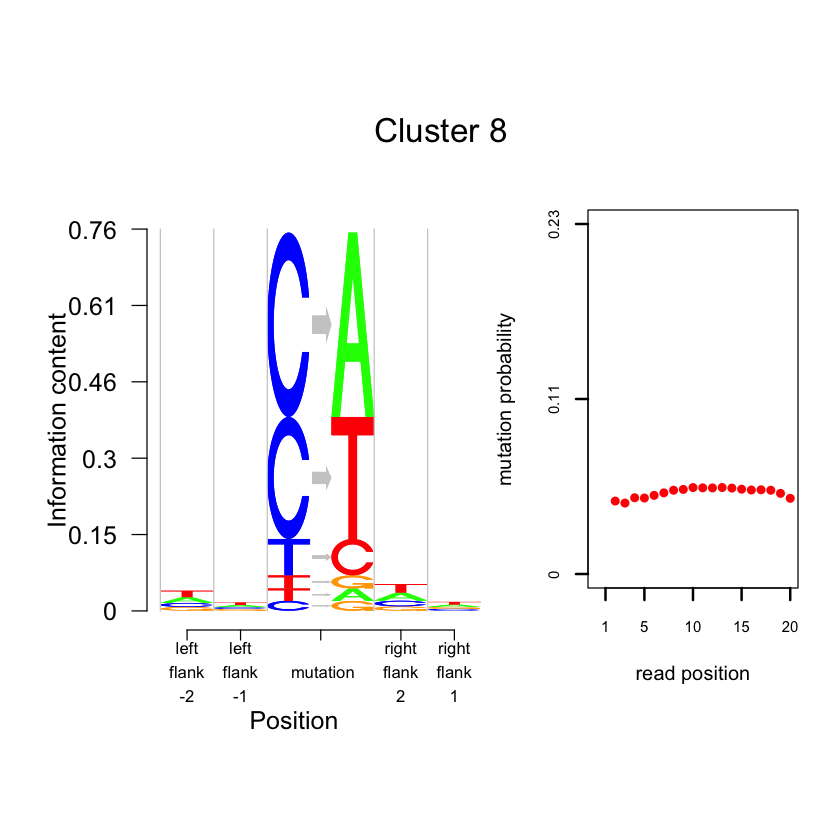

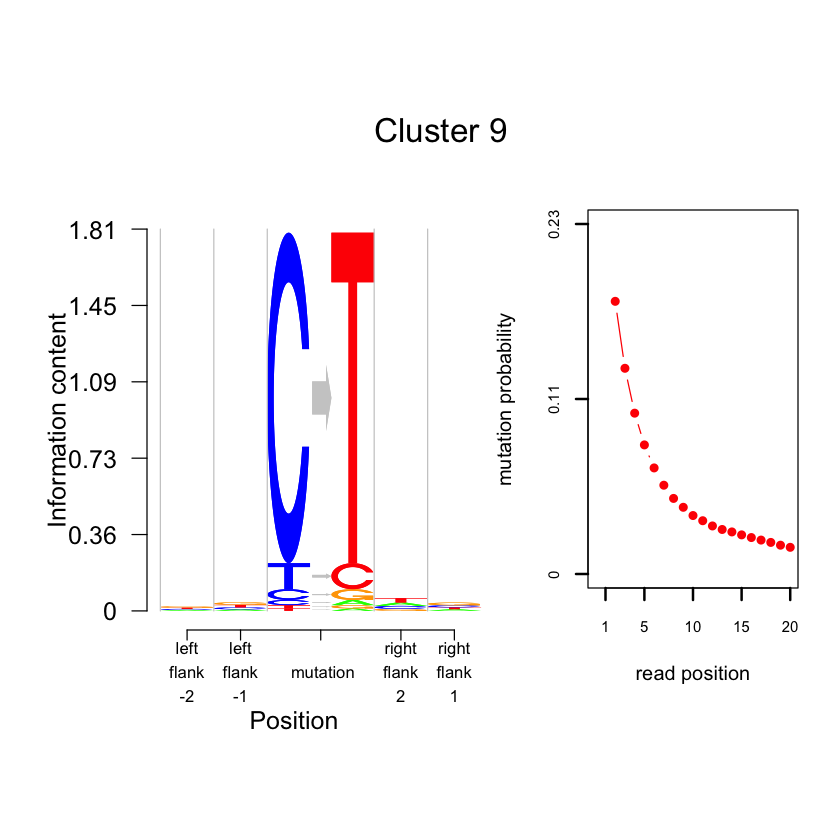

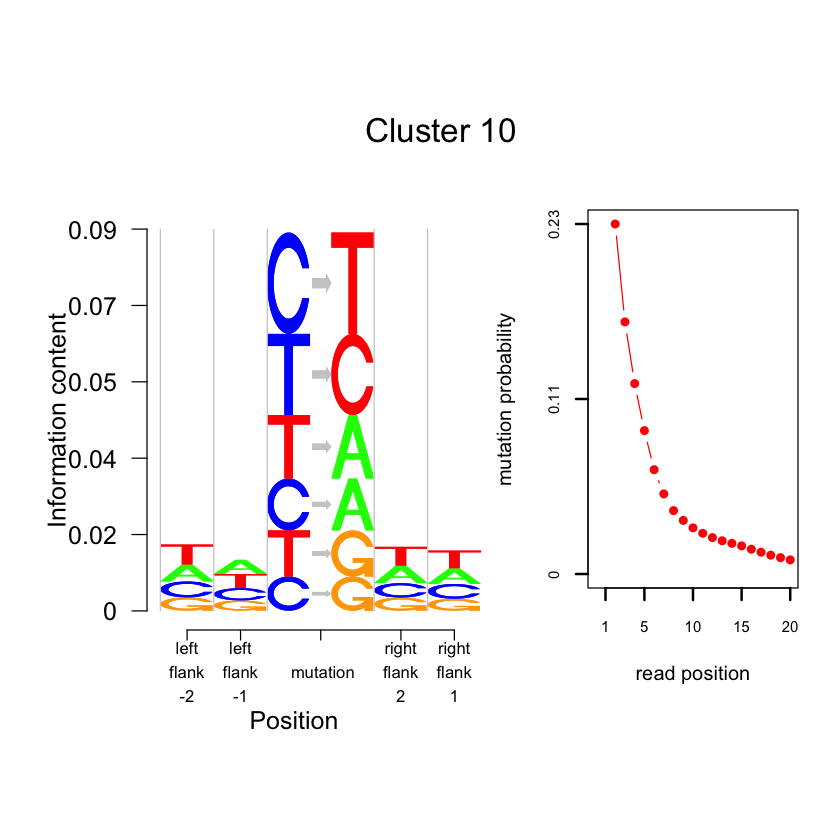

In [19]:
plot.new()
damageLogo_pos(out$theta)

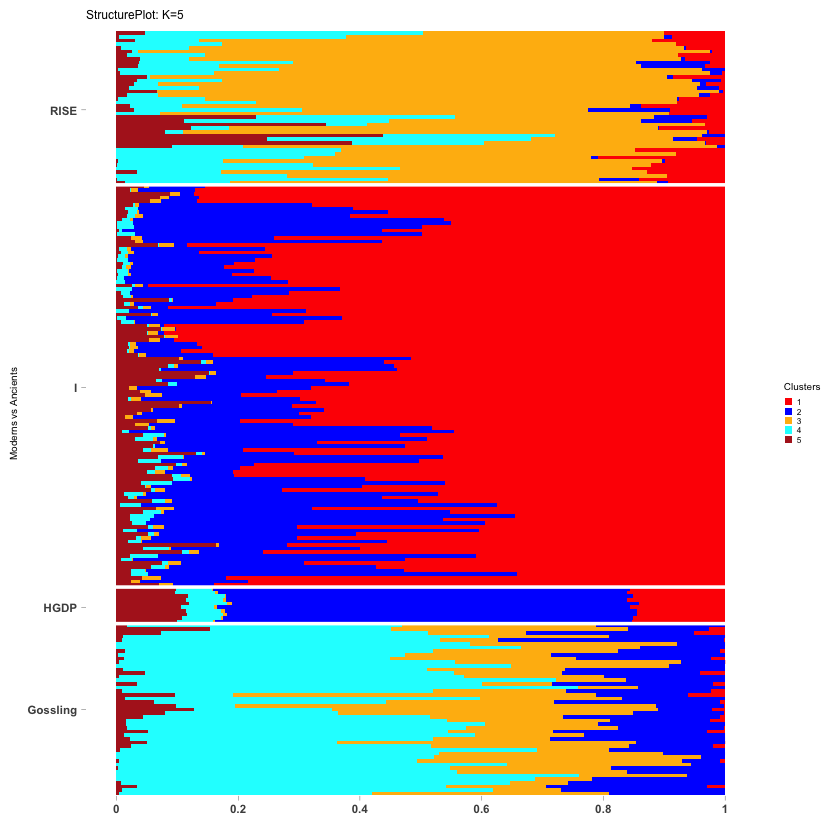

In [16]:
out <- get(load("../processed_data/maptpx-runs/i-rise-gosling-hgdp-maptpx-independent-K-5.rda"))

labs <- c(rep("Gossling", dim(filtered_gossling)[1]), rep("I", dim(filtered_I)[1]),
          rep("RISE", dim(filtered_RISE)[1]), rep("HGDP", dim(filtered_hgdp)[1]))
labs <- labs

omega <- out$omega

cols1 <- c("red","blue","darkgoldenrod1","cyan","firebrick", "green",
           "hotpink","burlywood","yellow","darkgray","deepskyblue","darkkhaki",
           "brown4","darkorchid","magenta","yellow", "azure1","azure4")

annotation <- data.frame(
  sample_id = paste0("X", c(1:NROW(omega))),
  tissue_label = factor(labs)
)

CountClust::StructureGGplot(omega = omega,
                            annotation = annotation,
                            palette = cols1,
                            yaxis_label = "Moderns vs Ancients",
                            order_sample = FALSE,
                            figure_title = paste0("StructurePlot: K=", dim(omega)[2],""),
                            axis_tick = list(axis_ticks_length = .1,
                                             axis_ticks_lwd_y = .1,
                                             axis_ticks_lwd_x = .1,
                                             axis_label_size = 7,
                                             axis_label_face = "bold"))

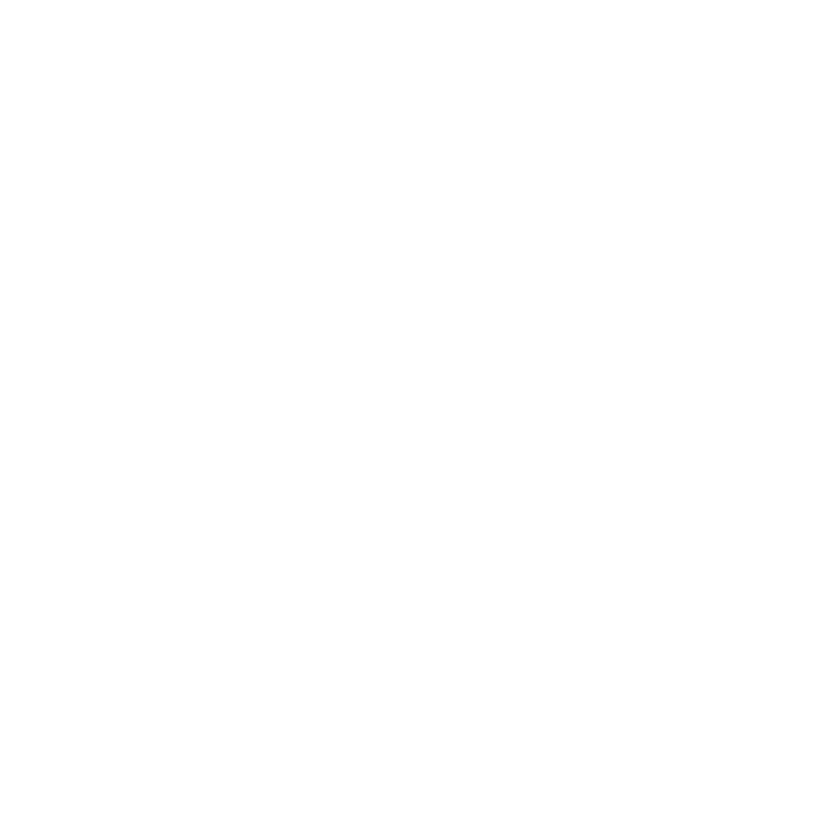

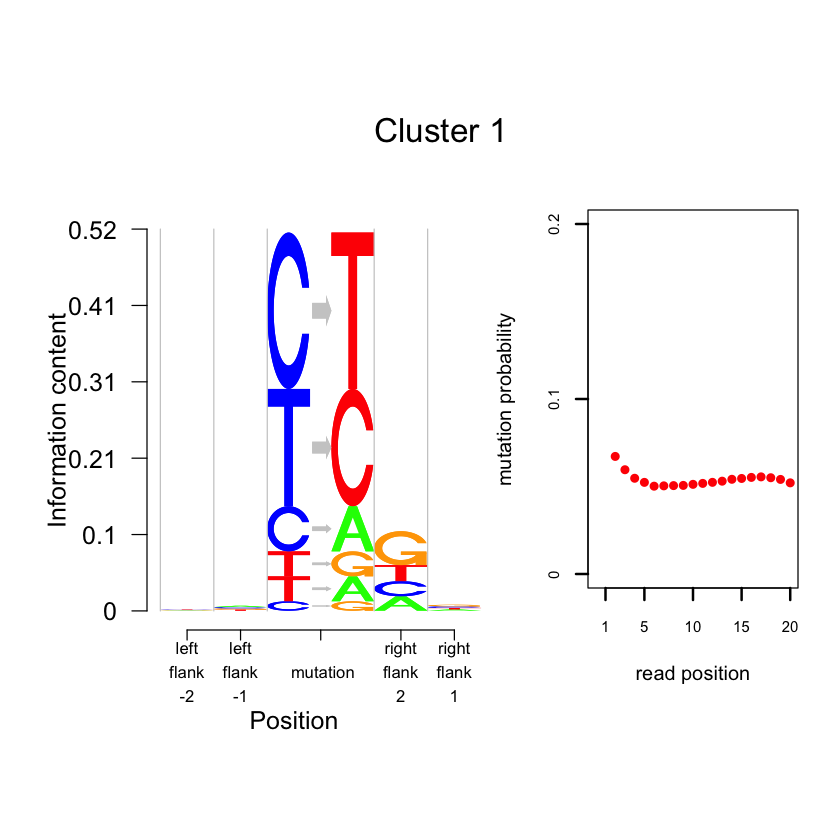

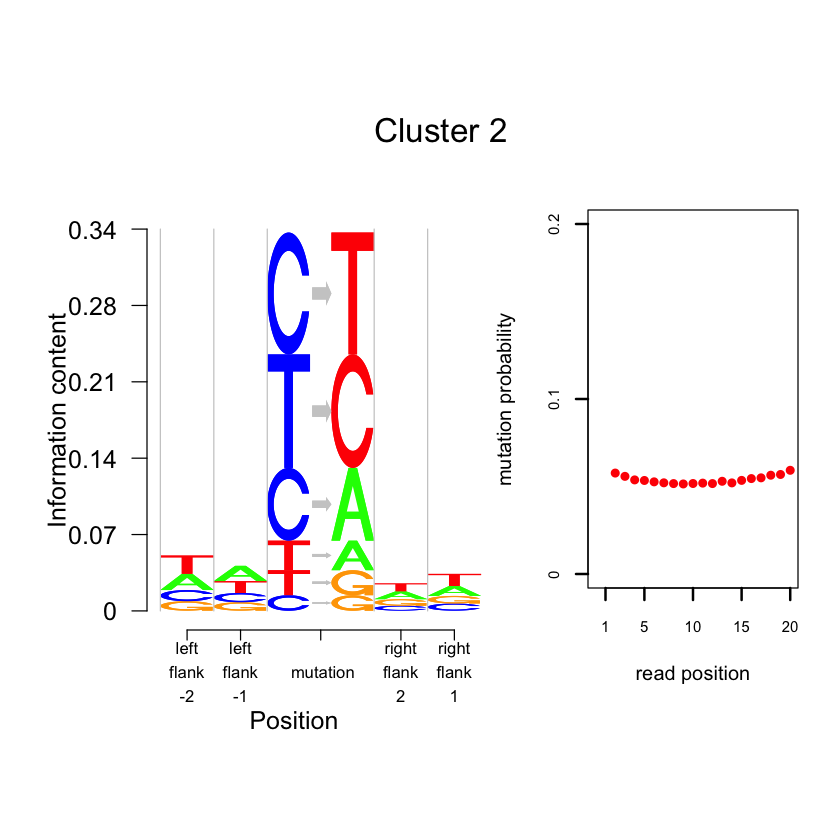

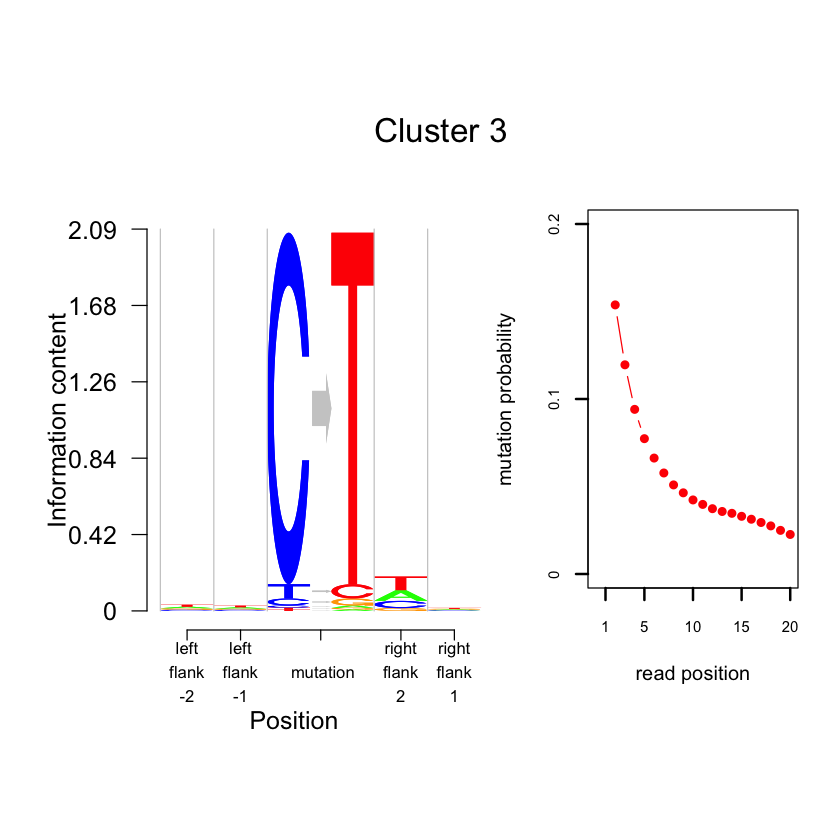

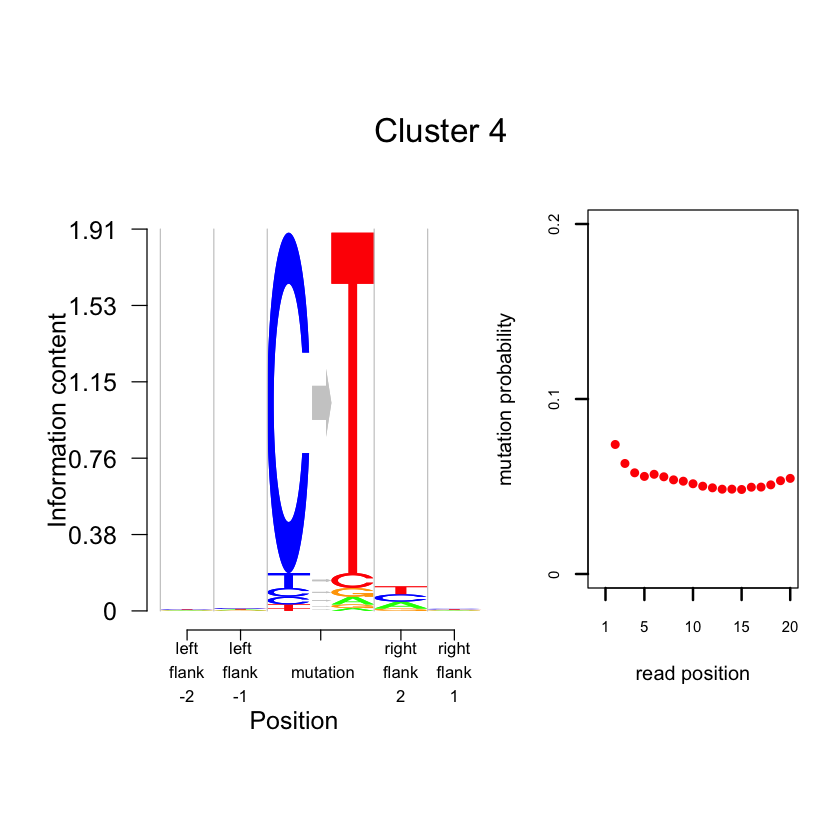

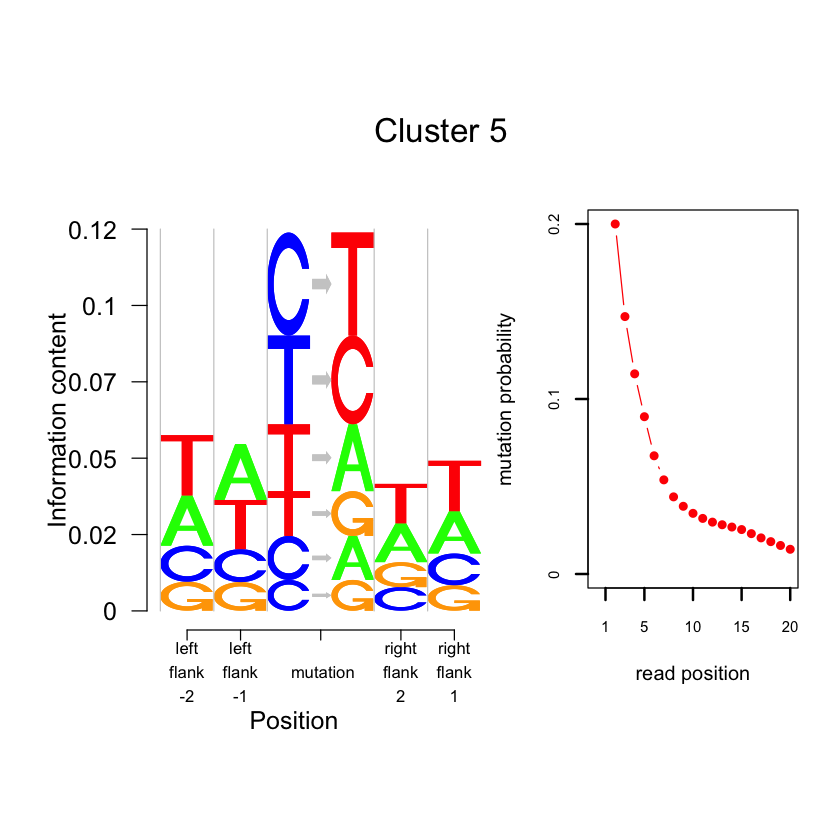

In [17]:
plot.new()
damageLogo_pos(out$theta)

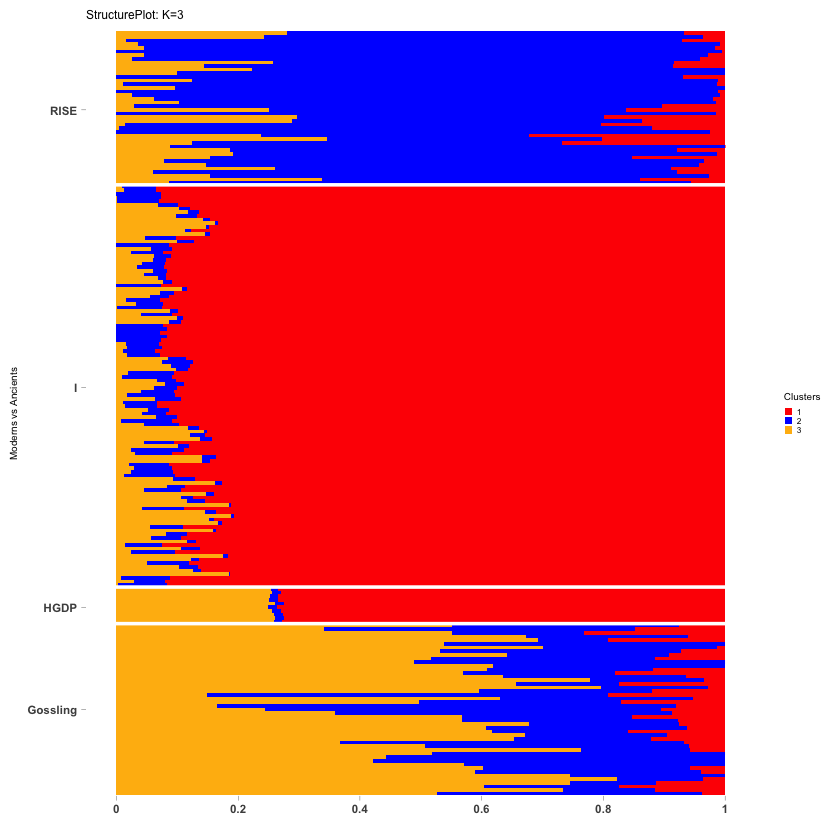

In [14]:
out <- get(load("../processed_data/maptpx-runs/i-rise-gosling-hgdp-maptpx-independent-K-3.rda"))

labs <- c(rep("Gossling", dim(filtered_gossling)[1]), rep("I", dim(filtered_I)[1]),
          rep("RISE", dim(filtered_RISE)[1]), rep("HGDP", dim(filtered_hgdp)[1]))
labs <- labs

omega <- out$omega

cols1 <- c("red","blue","darkgoldenrod1","cyan","firebrick", "green",
           "hotpink","burlywood","yellow","darkgray","deepskyblue","darkkhaki",
           "brown4","darkorchid","magenta","yellow", "azure1","azure4")

annotation <- data.frame(
  sample_id = paste0("X", c(1:NROW(omega))),
  tissue_label = factor(labs)
)

CountClust::StructureGGplot(omega = omega,
                            annotation = annotation,
                            palette = cols1,
                            yaxis_label = "Moderns vs Ancients",
                            order_sample = FALSE,
                            figure_title = paste0("StructurePlot: K=", dim(omega)[2],""),
                            axis_tick = list(axis_ticks_length = .1,
                                             axis_ticks_lwd_y = .1,
                                             axis_ticks_lwd_x = .1,
                                             axis_label_size = 7,
                                             axis_label_face = "bold"))

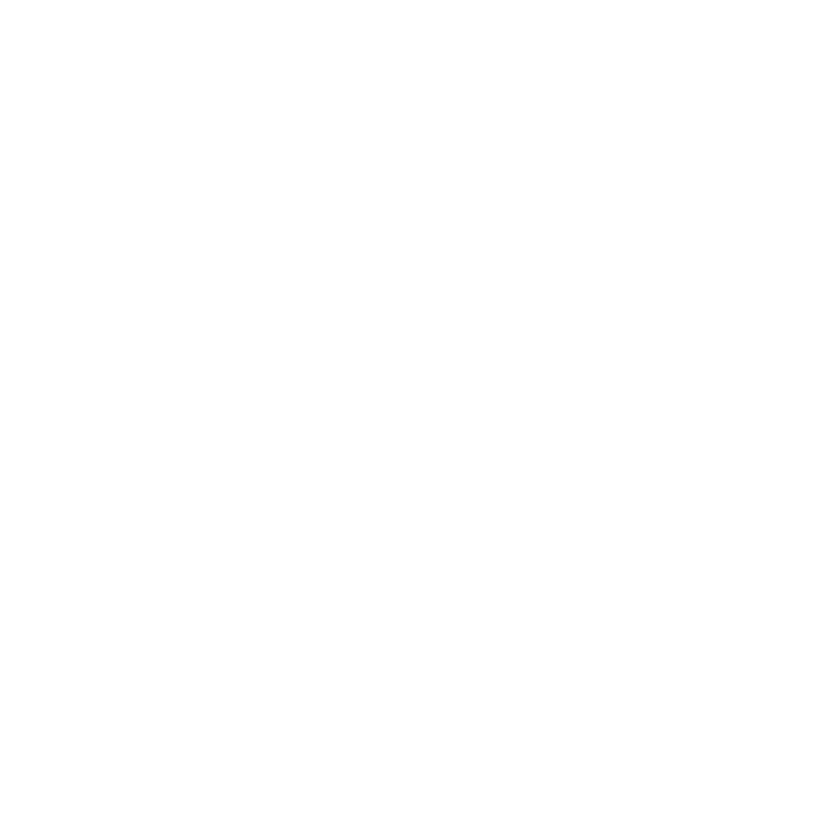

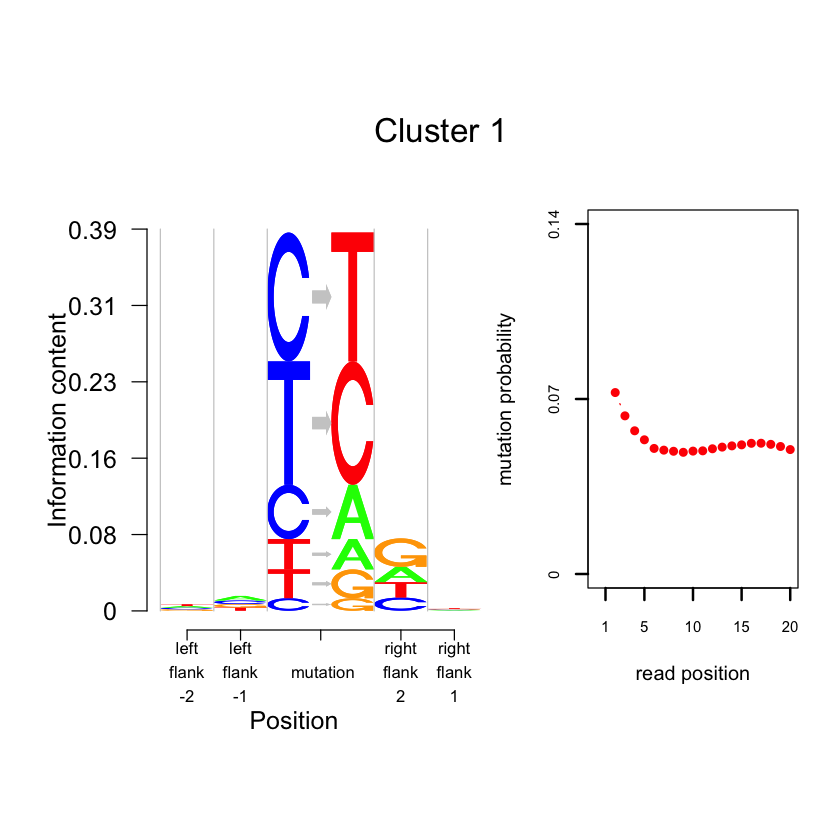

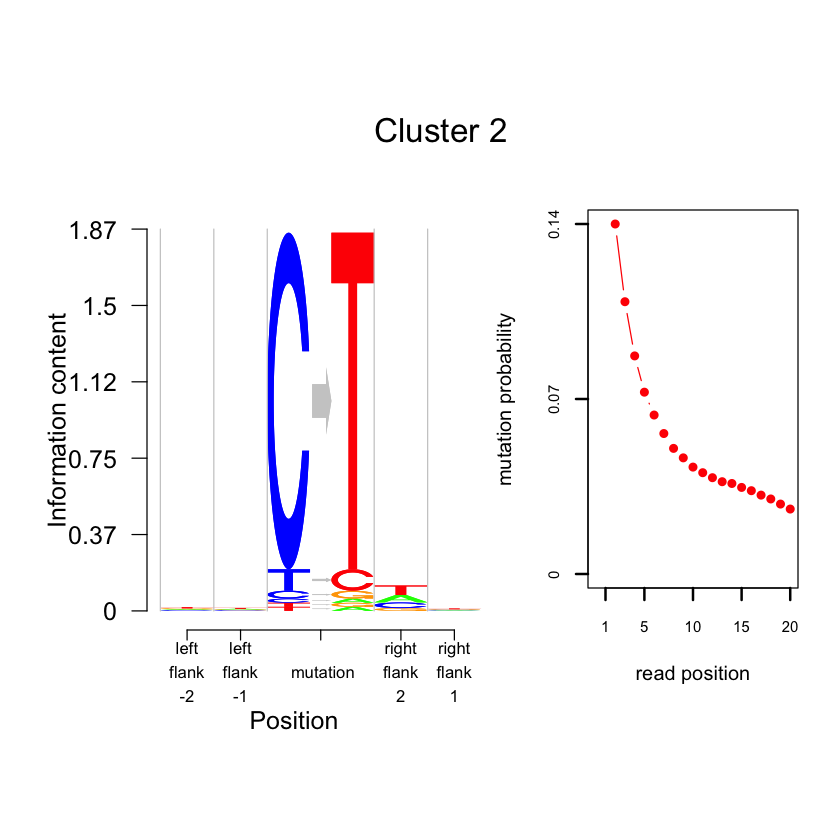

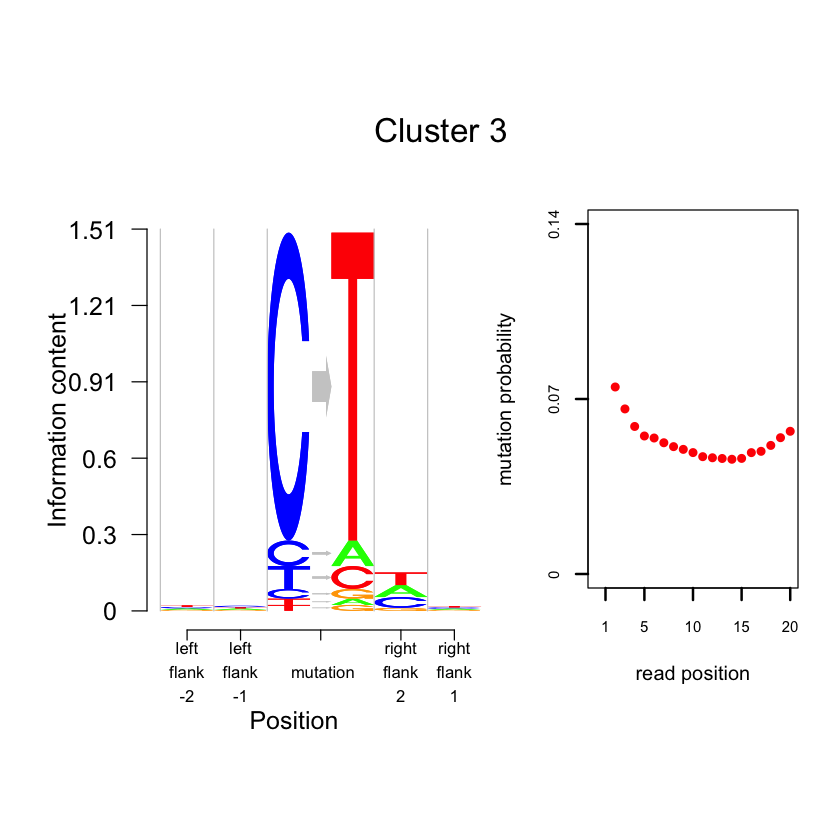

In [15]:
plot.new()
damageLogo_pos(out$theta)

## Batch effects

We remove the C to T mutations and try to see if there are any patterns visible.

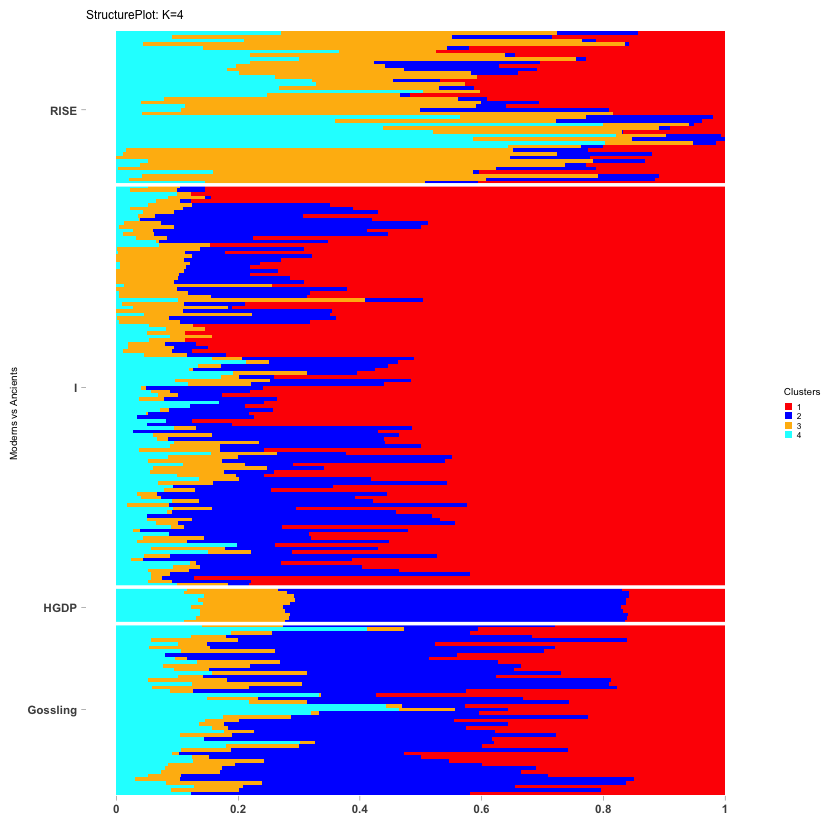

In [20]:
out <- get(load("../processed_data/maptpx-runs/i-rise-gosling-hgdp-maptpx-independent-K-4-noCtoT.rda"))

labs <- c(rep("Gossling", dim(filtered_gossling)[1]), rep("I", dim(filtered_I)[1]),
          rep("RISE", dim(filtered_RISE)[1]), rep("HGDP", dim(filtered_hgdp)[1]))
labs <- labs

omega <- out$omega

cols1 <- c("red","blue","darkgoldenrod1","cyan","firebrick", "green",
           "hotpink","burlywood","yellow","darkgray","deepskyblue","darkkhaki",
           "brown4","darkorchid","magenta","yellow", "azure1","azure4")

annotation <- data.frame(
  sample_id = paste0("X", c(1:NROW(omega))),
  tissue_label = factor(labs)
)

CountClust::StructureGGplot(omega = omega,
                            annotation = annotation,
                            palette = cols1,
                            yaxis_label = "Moderns vs Ancients",
                            order_sample = FALSE,
                            figure_title = paste0("StructurePlot: K=", dim(omega)[2],""),
                            axis_tick = list(axis_ticks_length = .1,
                                             axis_ticks_lwd_y = .1,
                                             axis_ticks_lwd_x = .1,
                                             axis_label_size = 7,
                                             axis_label_face = "bold"))

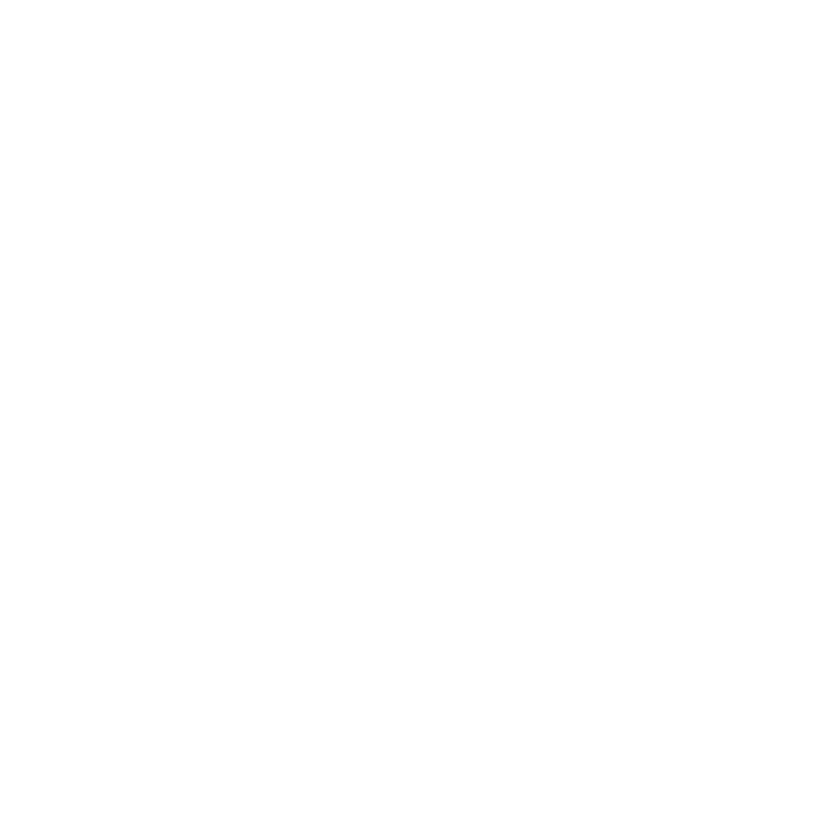

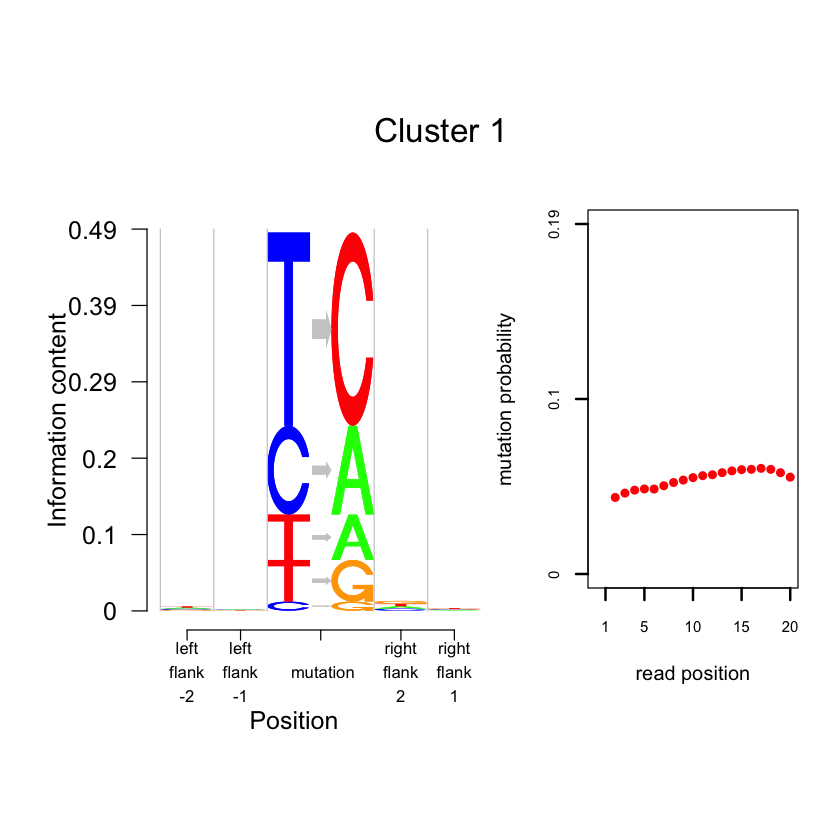

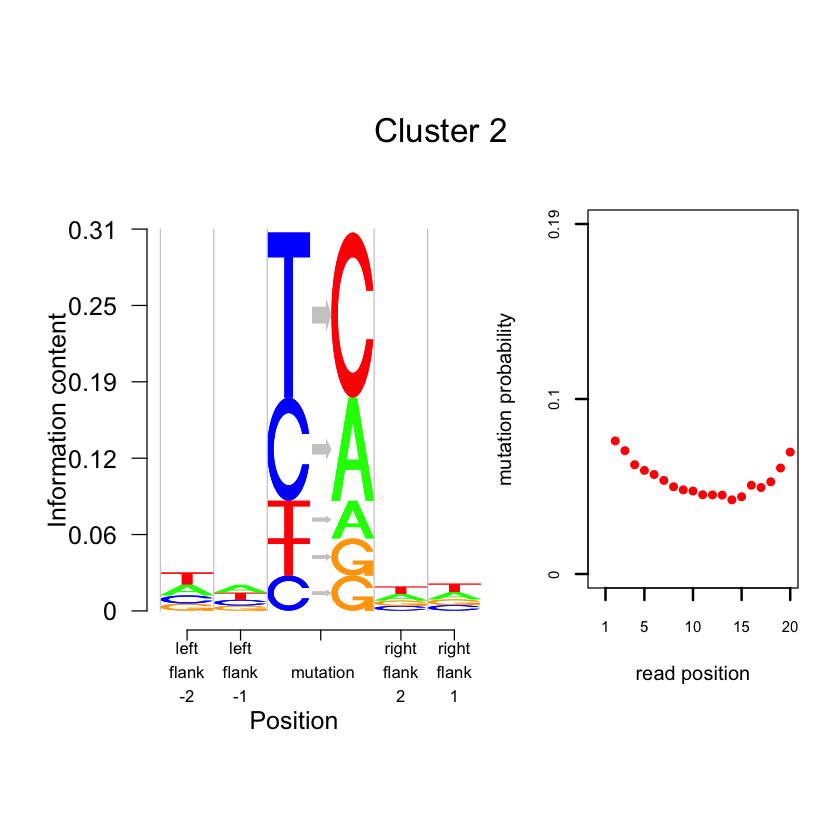

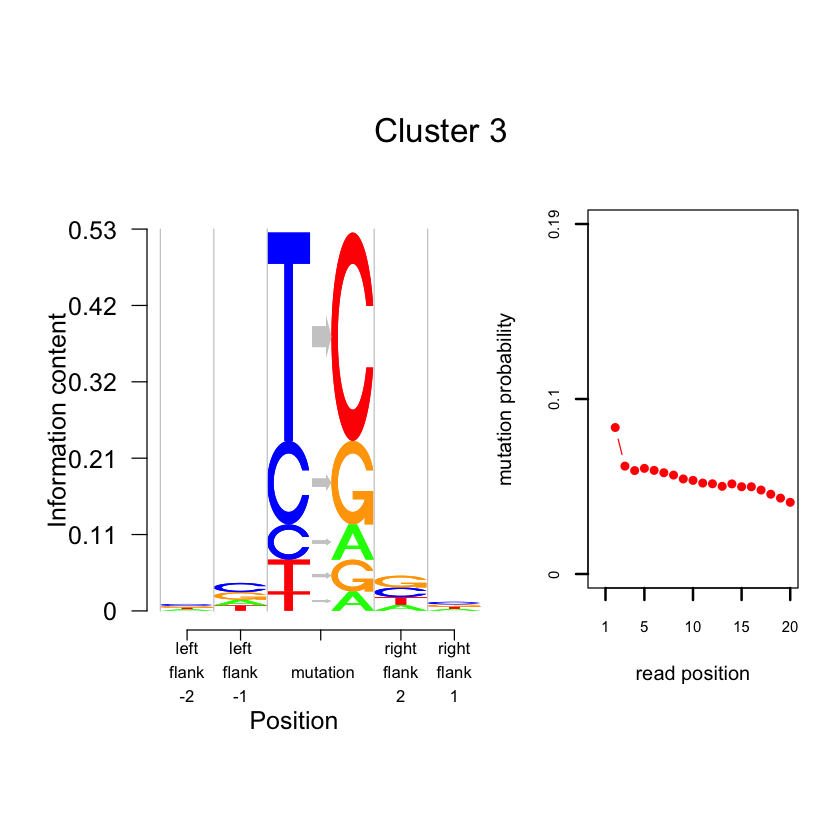

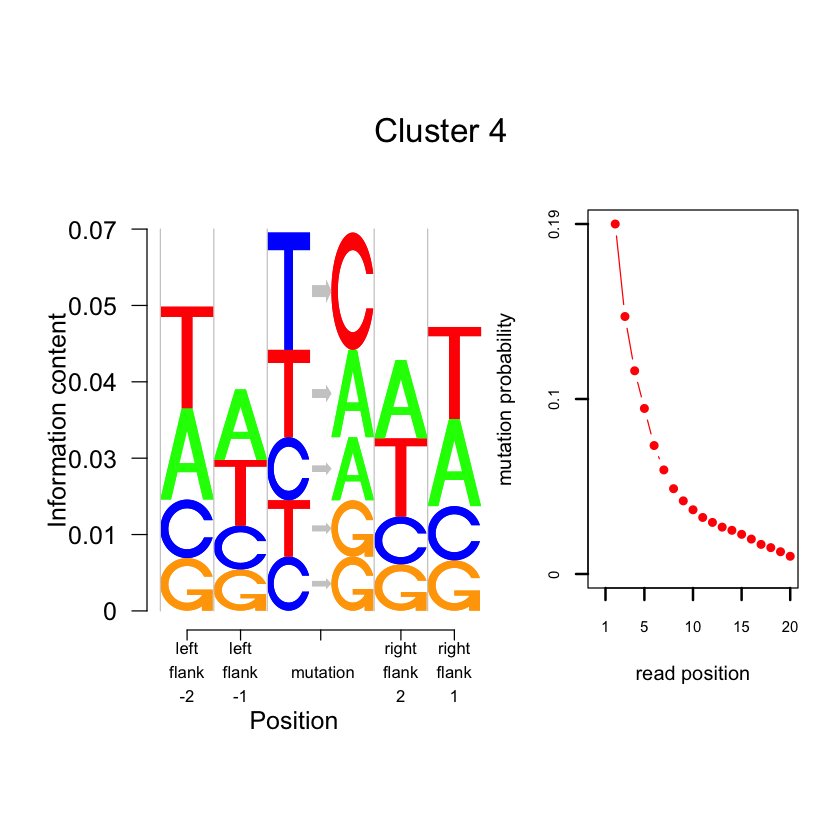

In [21]:
plot.new()
damageLogo_pos(out$theta)

## Summary

We see that lab homogeneity indeed show up in terms of mutation and flanking bases frequencies for the different data sources. This could be because of population substructure (given that the samples from a particular lab are probably close to each other in their genomic composition) or batch effects. 

In [22]:
sessionInfo()

R version 3.3.1 (2016-06-21)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: OS X 10.12 (Sierra)

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] gridBase_0.4-7   maptpx_1.9-3     CountClust_0.1.2 ggplot2_2.2.1   
[5] aRchaic_0.99.0  

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.8         plyr_1.8.4          tools_3.3.1        
 [4] boot_1.3-18         digest_0.6.11       uuid_0.1-2         
 [7] nlme_3.1-128        jsonlite_1.2        evaluate_0.10      
[10] tibble_1.2          gtable_0.2.0        lattice_0.20-34    
[13] mgcv_1.8-16         Matrix_1.2-7.1      IRdisplay_0.4.4    
[16] parallel_3.3.1      IRkernel_0.7.1      gridExtra_2.2.1    
[19] cluster_2.0.5       repr_0.10           stringr_1.1.0      
[22] gtools_3.5.0        stats4_3.3.1        nnet_7.3-12        
[25] cowplot_0.7.0  